In [64]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [65]:
verim04 = "/Users/hakanzip/Desktop/veri-bilimi-10-proje/04_Customer-Segmentation/Mall_Customers.csv"
p4customer = pd.read_csv(verim04)

In [66]:
p4customer.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [67]:
sütunlar = list(p4customer.columns)
sütunlar

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Sütunları gördük, her zamanki gibi Türkçe'mize çevirmek için tam hali lazım. Fazla da sütun yok ama adeti bozmayalım.

In [68]:
p4customer = p4customer.rename(columns={
    'CustomerID': 'MusteriID',
    'Gender': 'Cinsiyet',
    'Age': 'Yas',
    'Annual Income (k$)': 'Yillik_Gelir_USD',
    'Spending Score (1-100)': 'Harcama_Skoru_100'
})

In [69]:
p4customer.head(5)

,MusteriID,Cinsiyet,Yas,Yillik_Gelir_USD,Harcama_Skoru_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Türkçe'ye çevirme işlemi tamam.

In [ ]:
p4customer.isnull().sum()

MusteriID            0
Cinsiyet             0
Yas                  0
Yillik_Gelir_USD     0
Harcama_Skoru_100    0
dtype: int64

Eksik veri yok iyi.

In [71]:
p4customer.describe()

,MusteriID,Yas,Yillik_Gelir_USD,Harcama_Skoru_100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


İstatistiksel sınırlarımızı gördük.

In [72]:
p4customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MusteriID          200 non-null    int64 
 1   Cinsiyet           200 non-null    object
 2   Yas                200 non-null    int64 
 3   Yillik_Gelir_USD   200 non-null    int64 
 4   Harcama_Skoru_100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Sadece cinsiyet sütununu sayısala çevirmemiz gerekiyor.

In [73]:
p4customer.duplicated().sum()

np.int64(0)

Tekrarlayan satır da yok.

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
p4customer["Cinsiyet"] = le.fit_transform(p4customer["Cinsiyet"])

Sadece iki sınıf olduğundan gönül rahatlığıyla Label Encoder kullnarak veriyi sayısallaştırdık. Male:1, Female:0

In [75]:
p4customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   MusteriID          200 non-null    int64
 1   Cinsiyet           200 non-null    int64
 2   Yas                200 non-null    int64
 3   Yillik_Gelir_USD   200 non-null    int64
 4   Harcama_Skoru_100  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [76]:
p4customer.head(5)

,MusteriID,Cinsiyet,Yas,Yillik_Gelir_USD,Harcama_Skoru_100
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


FEATURE ENGINEERING

In [77]:
bins = [17, 25, 35, 50, 70]
labels = ['Genç(18-25)', 'Genç Yetişkin(26-35)', 'Yetişkin(36-50)', 'Olgun(51-70)']
p4customer['Yas_Grubu'] = pd.cut(p4customer['Yas'], bins=bins, labels=labels)

Yaşları kategorileştirdik.

In [78]:
gelir_bins = [0, 40, 70, 100, 150]
gelir_labels = ['Düşük', 'Orta', 'Üst-Orta', 'Yüksek']
p4customer['Gelir_Grubu'] = pd.cut(p4customer['Yillik_Gelir_USD'], bins=gelir_bins, labels=gelir_labels)

Gelirlerine göre kişileri kategorileştirdik.

EDA (EXPLORATORY DATA ANALYSİS)- GÖRSELLEŞTİRME

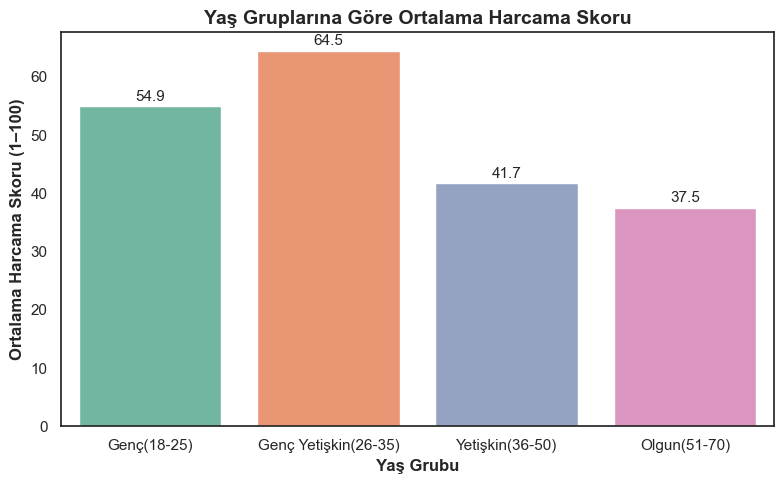

In [79]:
plt.figure(figsize=(8,5))
renkler = sns.color_palette("Set2")

barplot = sns.barplot(
    data=p4customer,
    x='Yas_Grubu',
    y='Harcama_Skoru_100',
    estimator='mean',
    ci=None,
    palette=renkler
)

for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        f"{height:.1f}",
        ha="center",
        fontsize=11,
    )

plt.title("Yaş Gruplarına Göre Ortalama Harcama Skoru", fontsize=14, fontweight='bold')
plt.xlabel("Yaş Grubu", fontsize=12, fontweight='bold')
plt.ylabel("Ortalama Harcama Skoru (1–100)", fontsize=12, fontweight='bold')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

Bu grafiğe göre en çok harcama yapan grup genç yetişkinler ve harcama skorları 64.5 imiş. Genç ve genç yetişkinlere yönelik indirim sağlanabilir veya geride kalan yetişkin ve olgun gruba hitap edecek kampanyalar yapılabilir.

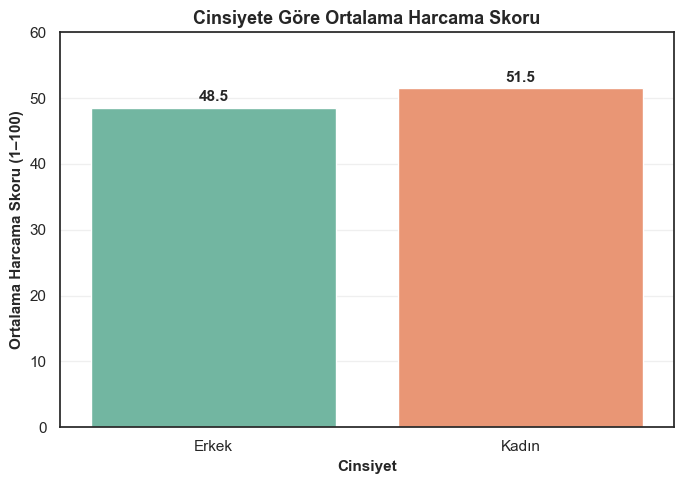

In [80]:
p4customer['Cinsiyet_Label'] = p4customer['Cinsiyet'].map({0: 'Kadın', 1: 'Erkek'})
plt.figure(figsize=(7, 5))
renkler = sns.color_palette("Set2")

barplot = sns.barplot(
    data=p4customer,
    x='Cinsiyet_Label',
    y='Harcama_Skoru_100',
    estimator='mean',
    ci=None,
    palette=renkler
)

for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        f"{height:.1f}",
        ha="center",
        fontsize=11,
        fontweight='bold'
    )

plt.title("Cinsiyete Göre Ortalama Harcama Skoru", fontsize=13, fontweight='bold')
plt.xlabel("Cinsiyet", fontsize=11, fontweight='bold')
plt.ylabel("Ortalama Harcama Skoru (1–100)", fontsize=11, fontweight='bold')
plt.ylim(0, 60) 
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

Kadınlar daha fazla alışveriş yapıyormuş. Doğal olarak :d

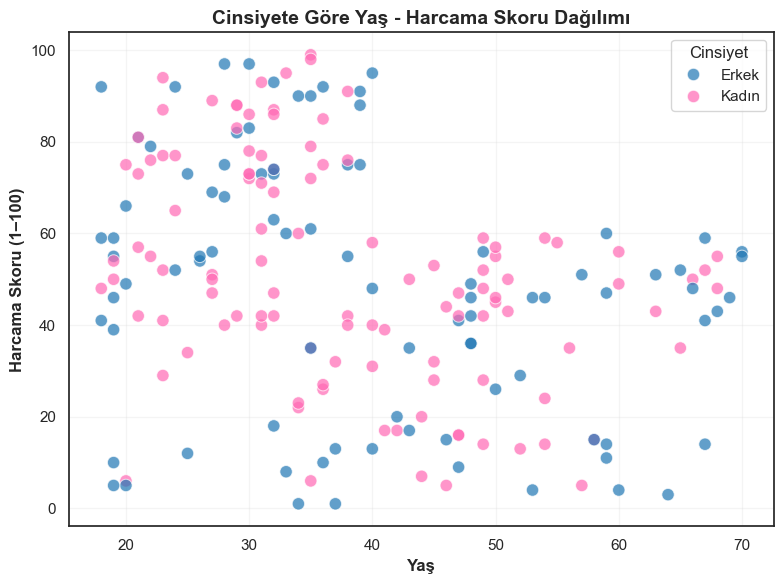

In [81]:
plt.figure(figsize=(8,6))
p4customer['Cinsiyet_Label'] = p4customer['Cinsiyet'].map({0: 'Kadın', 1: 'Erkek'})
renkler = {'Kadın': '#ff69b4', 'Erkek': '#1f77b4'}
sns.scatterplot(
    data=p4customer,
    x='Yas',
    y='Harcama_Skoru_100',
    hue='Cinsiyet_Label',
    palette=renkler,
    alpha=0.7,
    s=80
)

plt.title("Cinsiyete Göre Yaş - Harcama Skoru Dağılımı", fontsize=14, fontweight='bold')
plt.xlabel("Yaş", fontsize=12, fontweight='bold')
plt.ylabel("Harcama Skoru (1–100)", fontsize=12, fontweight='bold')
plt.legend(title="Cinsiyet", loc="upper right")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

Bu grafikte yaş ilerledikçe harcama skorunun düştüğü görülüyor. Özellikle 40 yaş sonrası ne kadın ne erkek 60 puanın üzerine çok fazla çıkmıyor. Yani alışverişte aktif ve yüksek harcayan kitle daha çok 25–40 yaş aralığı gibi görünüyor. Kampanya stratejileri de buna göre şekillendirilebilir.

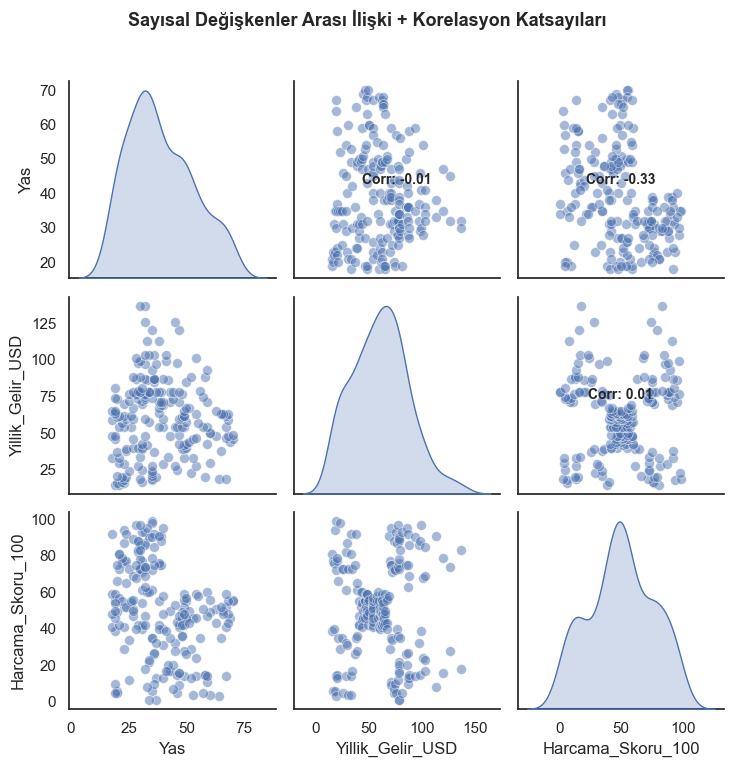

In [82]:
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"Corr: {r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=10, fontweight='bold')

sayisal_sutunlar = ['Yas', 'Yillik_Gelir_USD', 'Harcama_Skoru_100']
sns.set(style="white")
g = sns.pairplot(
    p4customer[sayisal_sutunlar],
    diag_kind="kde",
    corner=False,
    plot_kws={"alpha": 0.5, "s": 50}
)

g.map_upper(corrfunc)
plt.suptitle("Sayısal Değişkenler Arası İlişki + Korelasyon Katsayıları", y=1.02, fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

Bu grafik, yaş, gelir ve harcama skorları arasındaki tüm ilişkileri hem görsel hem sayısal olarak gösteriyor. Her hücrede iki değişkenin korelasyon katsayısı yazılı. Örneğin gelir ve harcama arasındaki korelasyon zayıfsa, bu ikisi birbirinden bağımsız hareket ediyor demektir. Korelasyonların güçlü olmadığı bu yapı, verinin segmentlenmeye uygun olduğunu da gösterir.

In [83]:
pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [84]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans

p4customer["Yillik_Gelir_1000"] = p4customer["Yillik_Gelir_USD"] / 1000
X = p4customer[['Yas', 'Yillik_Gelir_1000', 'Harcama_Skoru_100']]
model = KMeans(n_clusters=4, random_state=42)
p4customer['Kume'] = model.fit_predict(X)

fig = px.scatter_3d(
    p4customer,
    x='Yas',
    y='Yillik_Gelir_1000',
    z='Harcama_Skoru_100',
    color='Kume',
    title='3D Müşteri Segmentasyonu',
    width=800,
    height=600
)
fig.write_html("3d_kume_grafigi.html")

print("Grafik hazır. Dosya içinde sağ tık diyip çalıştırılabilir.")

Grafik hazır. Dosya içinde sağ tık diyip çalıştırılabilir.


In [85]:
fig.update_layout(
    scene=dict(
        xaxis_title='Yaş',
        yaxis_title='Gelir',
        zaxis_title='Harcama_Skoru_100'
    ),
    legend_title='Küme',
    title="3D Müşteri Segmentasyonu",
    title_x=0.5,
    margin=dict(l=0, r=0, b=0, t=50),
    width=650,
    height=500
)

Sarı küme genç ve orta gelirli ama harcamaları yüksek bir grup, kampanyalara en açık kitle olabilir. Mor küme daha çok orta yaşlı ve bol harcayan müşterilerden oluşuyor, bu yüzden özel ilgi gösterilebilir. Turuncu küme yaşlı ve düşük gelirli, genelde az harcama yapıyorlar. Lacivert küme ise genç ama gelir seviyesi düşük, harcamaları da orta seviyede. Her grubun yapısı farklı, ona göre yaklaşmak lazım.

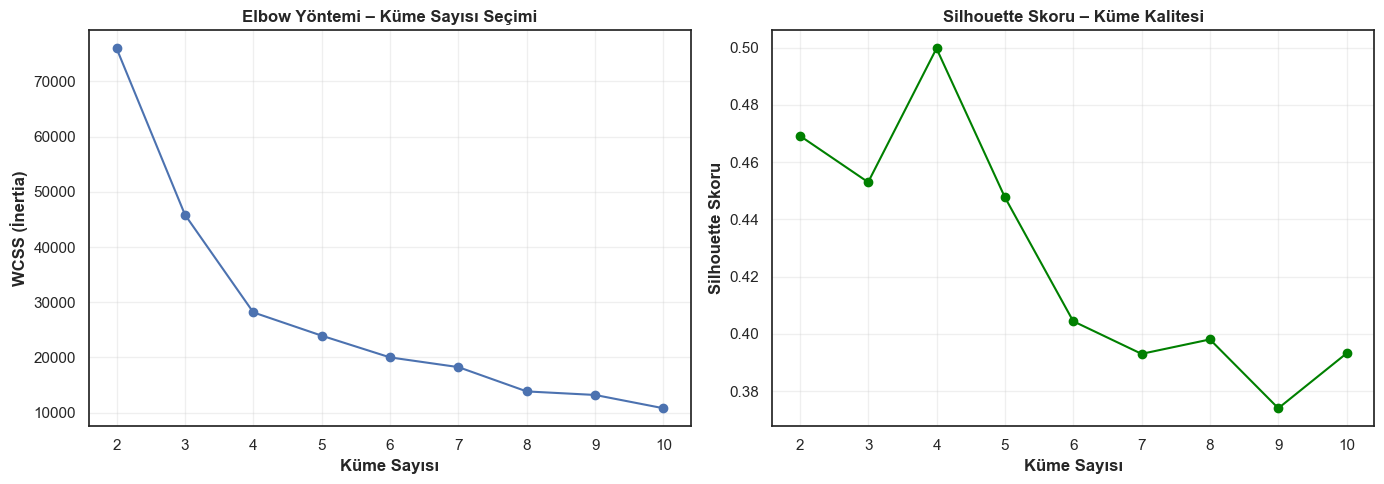

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = p4customer[['Yas', 'Yillik_Gelir_1000', 'Harcama_Skoru_100']]
wcss = []
sil_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
    sil_scores.append(silhouette_score(X, kmeans.labels_)) 

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(k_values, wcss, marker='o')
axes[0].set_title("Elbow Yöntemi – Küme Sayısı Seçimi", fontweight="bold")
axes[0].set_xlabel("Küme Sayısı", fontweight="bold")
axes[0].set_ylabel("WCSS (İnertia)", fontweight="bold")
axes[0].grid(alpha=0.3)
axes[1].plot(k_values, sil_scores, marker='o', color='green')
axes[1].set_title("Silhouette Skoru – Küme Kalitesi", fontweight="bold")
axes[1].set_xlabel("Küme Sayısı", fontweight="bold")
axes[1].set_ylabel("Silhouette Skoru", fontweight="bold")
axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()

Bu analizde iki farklı yöntemle (Elbow ve Silhouette) ideal küme sayısını test ettik. Elbow yöntemine göre 4 civarında bir kırılma noktası var, bu da doğru sayıda küme seçtiğimizi gösteriyor. Aynı şekilde silhouette skorları da en yüksek değerini 4 kümede veriyor. Yani segmentasyon işlemini doğru sayıda grupla yapmışız. Bu durum, modelimizin hem işlevsel hem de anlamlı gruplar ürettiğini doğruluyor.